# Velocidad de fragmentos en la ruptura de un tanque cilíndrico


## Modelo 
CILINDRO.


Determina la velocidad inicial de los fragmentos si el tanque se rompe inicialmete en 2 o 10 fragmentos 






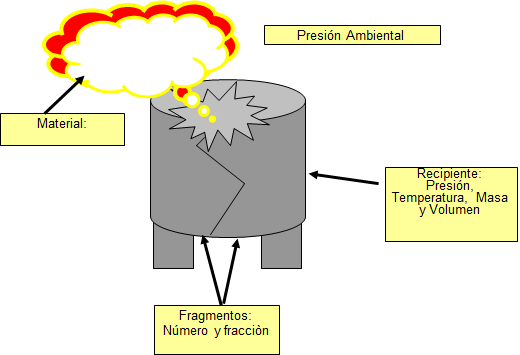

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|a, b|		Parámetros para calculo de la velocidad			
|Rg	|	Constante de los gases		|	J/gmol K|
|G	|	Geometrìa||			
|n	|	No. de fragementos		|2|	2 o 10|
|x1|		Fracción de masa del fragmento 1		|0.25	Sólo si n = 2|
|x2	|	Fracción de masa del fragmento 2		|0.75	|Sólo si n = 2|
|P|		Presión en el recipiente			|Pa|
|T| 		Temperatura en el recipente		|	K|
|D	|	Diamètro del recipiente		|	m|
|L|Altura del recipiente|m|
|MR|		Masa del recipiente		|	kg|
|$\gamma$	|	Relación de Cp/Cv		|1.67|	
|M|		Peso molecular del gas 		|	g/gmol|
|P0|		Presión ambiental			|Pa|







## Incógnitas


|Variable|Significado|Unidades|
|------|------|------|
|VR	|	Volumen del recipiente|		m^3|
|a0|		Velocidad sónica del gas en el tanque|		m/s|
|Ps|		Presión ajustada		|Adimensional|
|k|		Factor de ajuste		|Adimensional|
|u	|	Velocidad de los fragmentos		|m/s|



## Valores de Cp, Cv
Si se desconoce se puede hacer las siguientes aproximaciones:

$\gamma$ = 1.4 para gases diátomicos


$\gamma$= 1.32 para gases triátomicos

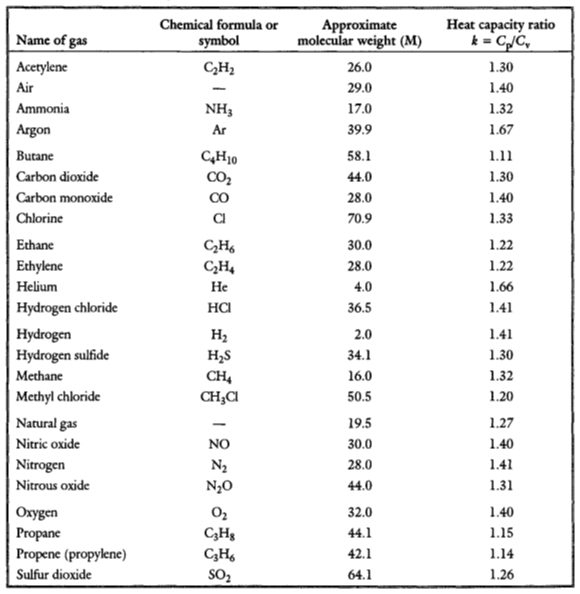

### Consideraciones
-  El modelo sirve para 2 y 10 fragmentos
- Si se tienen 10 fragmentos, se consideran que todos son iguales, por lo tanto tienen la misma velocidad
- Tipicamente se tienen 2 o 3 fragmentos










## Desarrollo y ecuaciones

Para determinar la velocidad de los fragmentos del tanque se requiere determinar varios parámetros, uno de ellos es la Presión ajustada:




- Ecuación 1.  $P_S=\frac{(P-P_0)V_R}{M_Ra_0^2}$

Para calcular la a0 se usa la siguiente ecuación:


- Ecuación 2. $a_0=(\frac{T\gamma R_g}{M})^{1/2}$

Además se requiere un factor de ajuste para ls fragmentos:

- Ecuación 3.  $k=1.306x+0.308446$

Con estos datos se calcula la velocidad:

- Ecuación 4.  $V=ka_0 exp (alnP_s+b)$

## Resultados


In [1]:
#Datos
Rg=8.314#J/gmol K
n=2
x1=0.25
x2=0.75
P=2.01E+07#Pa
T=300#K
D=0.2#m
L= 2#m
MR=100#Kg
gamma=1.67
M=4 #g/mol
P0=1.01E+05#Pa

Se calcula el volumen del recipiente:

In [4]:
import numpy as np
VR=np.pi*(D)**2*L/4
print("VR= "+ str(round(VR,4))+" m^3")

VR= 0.0628 m^3


Velocidad sonica:

In [5]:
a0=np.sqrt(1000*T*gamma*Rg/M)
print("a0= "+ str(round(a0,2))+" m/s")


a0= 1020.46 m/s


Se calcula la presión ajustada:

In [6]:
Ps=(P-P0)*VR/MR/a0**2
print("Ps= "+ str(round(Ps,4))+" ")


Ps= 0.0121 


In [7]:
Nfrag=np.array([2,10])
a=np.array([0.814896,0.591785])
b=np.array([0.355218,0.602712])

Se calcula el parámetro k:

In [8]:
# Para 2 fragmentos
x=np.array([x1,x2])
k=(1.306*x)+0.308446
k10=(1.306*(1/10))+0.308446
u=k*a0*np.exp(a*np.log(Ps)+b)
u10=k10*a0*np.exp(a[1]*np.log(Ps)+b[1])

print('{:^10}''{:^10}'.format('Fragmento','k'))

for i in range(len(x)):
    
    print('{:^10}''{:^10.3f}'.format(i+1,k[i]))

Fragmento     k     
    1       0.635   
    2       1.288   


Para 10 fragmentos:

In [9]:
print(f"k de 10 fragmentos= {k10:.3f}")

k de 10 fragmentos= 0.439


Se calcula la velocidad de cada fragmento:

In [10]:
print('{:^10}''{:^10}'.format('Fragmento','u [m/s]'))

for i in range(len(x)):
    
    print('{:^10}''{:^10.2f}'.format(i+1,u[i]))

Fragmento  u [m/s]  
    1       25.26   
    2       175.86  


Para 10 fragmentos:

In [11]:
print(f"u de 10 fragmentos= {u10:.2f}"+" m/s")

u de 10 fragmentos= 59.95 m/s
